## Loan Prediction

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns

In [113]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [114]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [115]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data_train['Gender'] = data_train['Gender'].fillna(data_train['Gender'].dropna().mode().values[0])
data_train['Married'] = data_train['Married'].fillna(data_train['Married'].dropna().mode().values[0])
data_train['Dependents'] = data_train['Dependents'].fillna(data_train['Dependents'].dropna().mode().values[0])
data_train['Self_Employed'] = data_train['Self_Employed'].fillna(data_train['Self_Employed'].dropna().mode().values[0])
data_train['LoanAmount'] = data_train['LoanAmount'].fillna(data_train['LoanAmount'].dropna().median())
data_train['Loan_Amount_Term'] = data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].dropna().mode().values[0])
data_train['Credit_History'] = data_train['Credit_History'].fillna(data_train['Credit_History'].dropna().mode().values[0])

In [7]:
total = data_train.isnull().sum().sort_values(ascending=False)
percent = (total / data_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0


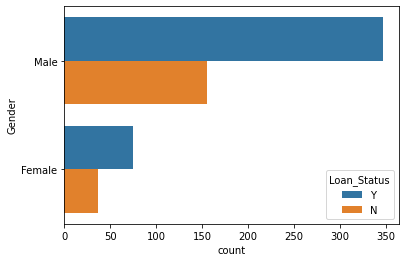

In [8]:
sns.countplot(y='Gender', hue='Loan_Status', data=data_train)

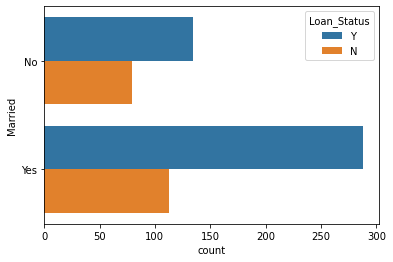

In [9]:
sns.countplot(y='Married', hue='Loan_Status', data=data_train)

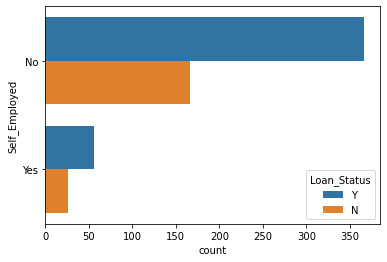

In [10]:
sns.countplot(y='Self_Employed', hue='Loan_Status', data=data_train)

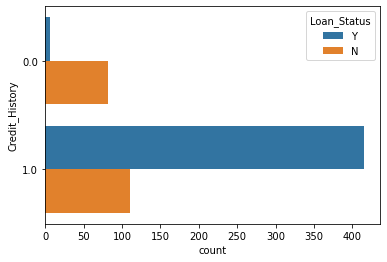

In [11]:
sns.countplot(y="Credit_History", hue="Loan_Status", data=data_train)

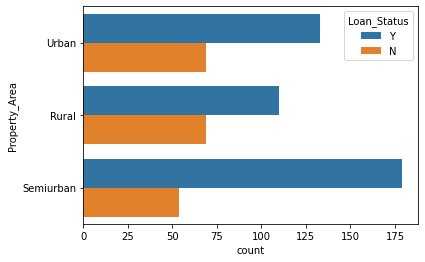

In [12]:
sns.countplot(y='Property_Area', hue='Loan_Status', data=data_train)

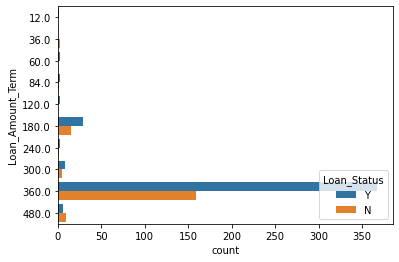

In [13]:
sns.countplot(y='Loan_Amount_Term', hue="Loan_Status", data=data_train)

c:\users\dpe\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


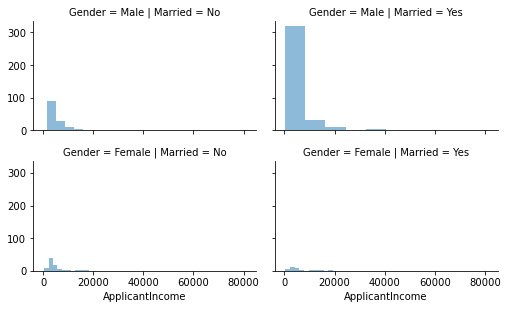

In [14]:
grid = sns.FacetGrid(data_train, row='Gender', col='Married', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

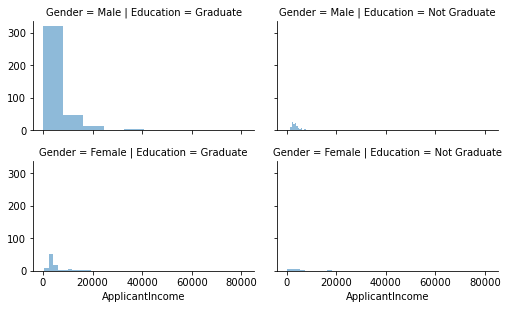

In [15]:
grid = sns.FacetGrid(data_train, row='Gender', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

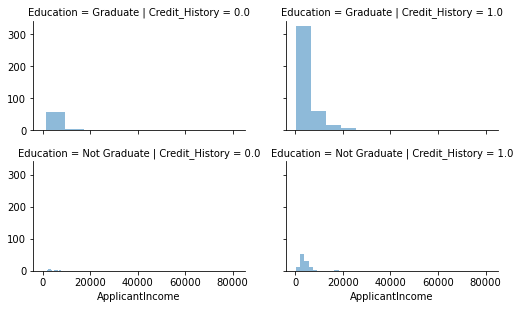

In [16]:
grid = sns.FacetGrid(data_train, row='Education', col='Credit_History', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

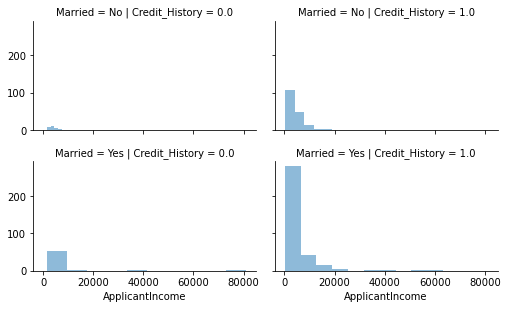

In [17]:
grid = sns.FacetGrid(data_train, row='Married', col='Credit_History', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

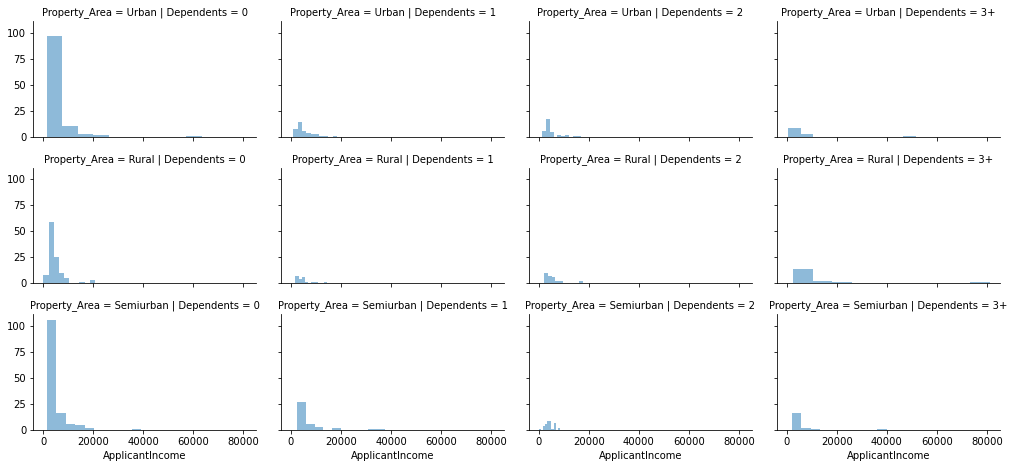

In [18]:
grid = sns.FacetGrid(data_train, row='Property_Area', col='Dependents', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

In [19]:
code_numeric = {'Male':1, 'Female':2, 
                'Yes':1, 'No':2, 
                'Graduate':1, 'Not Graduate':2, 
                'Rural':1, 'Semiurban':2, 'Urban':3, 
                'Y':1, 'N':0,
                '3+':3
                }

In [20]:
data_train = data_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [21]:
data_test = data_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [22]:
data_train.drop('Loan_ID', axis=1, inplace=True)

In [23]:
data_train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [24]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 55.2+ KB


In [25]:
Dependents_train = pd.to_numeric(data_train.Dependents)

In [26]:
Dependents_test = pd.to_numeric(data_test.Dependents)

In [27]:
data_train.drop(['Dependents'], axis=1, inplace=True)

In [28]:
data_test.drop(['Dependents'], axis=1, inplace=True)

In [29]:
data_train = pd.concat([data_train, Dependents_train], axis=1)

In [30]:
data_test = pd.concat([data_test, Dependents_test], axis=1)

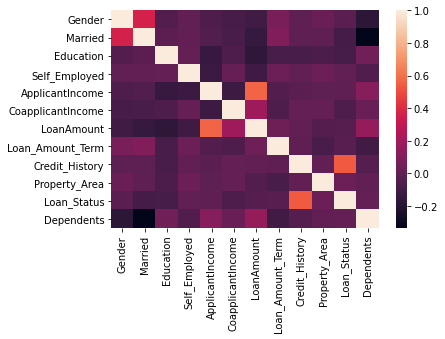

In [31]:
sns.heatmap(data_train.corr())

In [45]:
corr_mat = data_train.corr()

In [49]:
corr_mat["LoanAmount"].sort_values(ascending=False)

LoanAmount           1.000000
ApplicantIncome      0.565181
CoapplicantIncome    0.189218
Dependents           0.163103
Loan_Amount_Term     0.036960
Credit_History      -0.000607
Loan_Status         -0.033214
Property_Area       -0.046632
Gender              -0.106904
Self_Employed       -0.115100
Married             -0.146546
Education           -0.168759
Name: LoanAmount, dtype: float64

In [32]:
y = data_train['Loan_Status']

In [33]:
X = data_train.drop('Loan_Status', axis=1)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_test

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents
350,1,1,1,2,9083,0.0,228.0,360.0,1.0,2,0
377,1,1,1,2,4310,0.0,130.0,360.0,1.0,2,0
163,1,1,1,2,4167,1447.0,158.0,360.0,1.0,1,2
609,2,2,1,2,2900,0.0,71.0,360.0,1.0,1,0
132,1,2,1,2,2718,0.0,70.0,360.0,1.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
231,1,1,1,2,3716,0.0,42.0,180.0,1.0,1,0
312,2,2,1,2,2507,0.0,56.0,360.0,1.0,1,0
248,1,1,1,2,2882,1843.0,123.0,480.0,1.0,2,1
11,1,1,1,2,2500,1840.0,109.0,360.0,1.0,3,2


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
model = LogisticRegression()
# model = DecisionTreeClassifier()
# model = RandomForestClassifier()

In [39]:
model.fit(X_train, y_train)

LogisticRegression()

In [110]:
predict = model.predict(X_test)

In [111]:
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [42]:
from sklearn.metrics import f1_score

In [43]:
evolution = f1_score(y_test, predict)

In [44]:
evolution

0.8586956521739131

Random: 0.8397790055248618

Decision: 0.787878787878788

Logistic: 0.8586956521739131